---
execute:
  echo: false
---

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/churn_data.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# function to create percentage churn plot for categorical variables

def plot_churn_percentage_by_column(df, column, color_map=None):
    """
    Plots % churn (Churn=Yes/No) grouped by a given categorical column.

    Parameters:
    - df: pandas DataFrame with a binary 'Churn' column (0/1 or 'Yes'/'No')
    - column: name of the column to group by (str)
    - color_map: dictionary to customize colors for 'Churn' values (optional)
    """

    # Prepare color map if not provided
    if color_map is None:
        color_map = {'Yes': '#f97a73', 'No': '#11c1c6'}

    # Group and calculate % within each category
    plot_df = (
        df.groupby([column, 'Churn'])
          .size()
          .reset_index(name='count')
    )
    plot_df['percent'] = plot_df.groupby(column)['count'].transform(lambda x: x / x.sum() * 100)

    # Plot
    plt.figure(figsize=(6, 4))
    sns.barplot(data=plot_df, x=column, y='percent', hue='Churn', palette=color_map)

    # Aesthetics
    plt.title(f"Percentage Churn by {column.capitalize()}")
    plt.xlabel(column.capitalize())
    plt.ylabel("")
    plt.gca().axes.yaxis.set_visible(False)

    # Annotate bars
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0.5:
            plt.gca().annotate(f'{height:.1f}%',
                               (p.get_x() + p.get_width() / 2., height),
                               ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


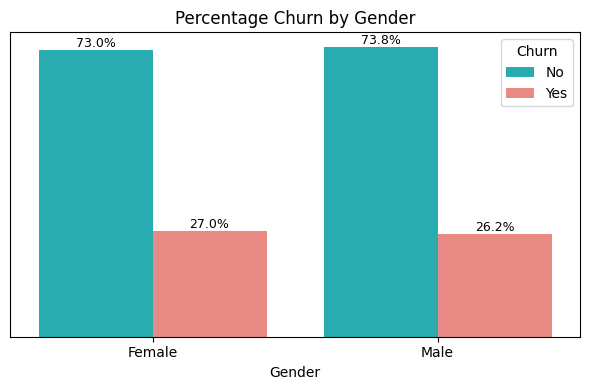

In [4]:
plot_churn_percentage_by_column(df, column='gender')

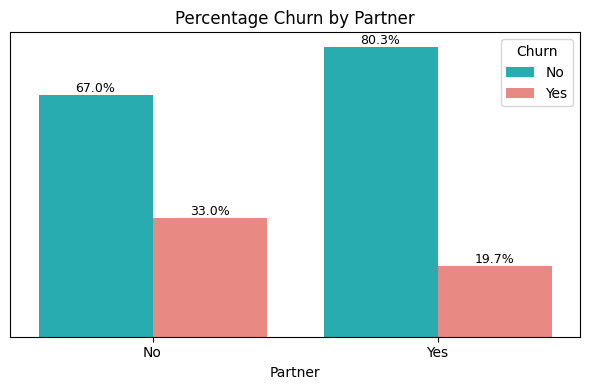

In [5]:
plot_churn_percentage_by_column(df, column='Partner')

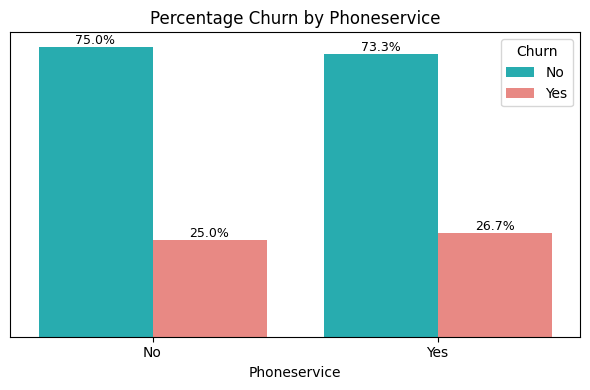

In [6]:
plot_churn_percentage_by_column(df, column='PhoneService')

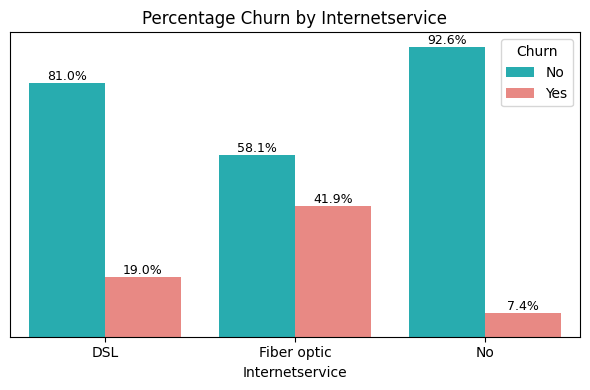

In [7]:
plot_churn_percentage_by_column(df, column='InternetService')